Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Enter** **data**

In [2]:
df=pd.read_csv("housing.csv")

بررسی تعداد مقادیر گمشده هر ستون

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

نمایش اطلاعات کلی درباره دیتافریم

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


نمایش خلاصه آماری داده ها

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


تابعی برای شافل (در هم ریختن) و تقسیم داده ها به داده های آموزش و تست

In [8]:
def shuffle_and_split_df(df,test_ratio):
  np.random.seed(42) # تنظیم سیید برای تولید تصادفی قابل تکرار
  random_indices=np.random.permutation(len(df))
  test_set_size=int(len(df)*test_ratio)
  test_indices=random_indices[:test_set_size]
  train_indices=random_indices[test_set_size:]
  return df.iloc[train_indices],df.iloc[test_indices]
train_est,test_set=shuffle_and_split_df(df,0.2)


In [9]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


ما میخواهیم که اگر به داده های فعلی ، داده جدیدی اضافه شد یا هر اتفاق دیگری که روی داده های ما افتاد ، داده های تست قبلی وارد ترین نشوند و در قسمت تست جدید هم حضور داشته باشند. که این دو تابع زیر این کار را برای ما انجام میدهد

روش پایدار تر برای تقسیم داده ها با استفاده از هش و ایندکس (برای حفظ یکپارچگی تقسیم)

In [10]:
from zlib import crc32 # کتابخانه‌ای برای محاسبه‌ی هش (hash)

def is_identifier_in_test_set(identifier,test_ratio):
    # بررسی اینکه آیا یک نمونه باید در مجموعه تست قرار بگیرد یا نه
  return crc32(np.int64(identifier)) < test_ratio*2**32
def split_train_test_with_indentifier_hash(df,test_ratio,indentifier_column):
  indentifiers=df[indentifier_column] # دریافت ستون شناسه‌ها
  # مشخص می‌کند کدام نمونه‌ها در تست قرار می‌گیرند
  in_test_set= indentifiers.apply(lambda id_:is_identifier_in_test_set(id_,test_ratio))
  return df.loc[~in_test_set],df.loc[in_test_set]
  # تقسیم داده‌ها بر اساس ایندکس (پس از ریست کردن ایندکس برای اطمینان از یکتا بودن آن)
train_set,test_set= split_train_test_with_indentifier_hash(df.reset_index(),0.2,"index")

ما از ایندکس ردیف‌ها  به‌عنوان شناسه‌ی منحصربه‌ فرد استفاده کردیم. اما مشکلش اینه:


*   اگر ترتیب یا محتوای ردیف‌ها در آینده تغییر کنه (مثلاً به خاطر حذف یا اضافه‌ی ردیف)، ایندکس‌ها هم تغییر می‌کنن.


*   در نتیجه، تقسیم train/test شما در دفعات بعدی ممکنه فرق کنه.


*   این یعنی: نشتی داده (data leakage) ممکنه رخ بده، یا نتیجه مدل ناپایدار بشه.







#   (latitude) و (longitude)روش دقیق‌تر برای تعریف شناسه‌ها بر اساس   

In [11]:
df_with_identifier = df.copy()
# ایجاد یک ستون شناسه جدید با ترکیب longitude و latitude (برای یکتاسازی هر موقعیت مکانی)
df_with_identifier["identifier"] = df["longitude"] * 1000 + df["latitude"]

# استفاده از همان تابع قبلی برای تقسیم داده بر اساس این شناسه جدید
train_set, test_set = split_train_test_with_indentifier_hash(df_with_identifier, 0.2, "identifier")

ما از مختصات جغرافیایی به‌عنوان مبنای شناسه استفاده کردیم. این کار چه مزایایی داره؟

*  ترکیب این دو ویژگی معمولاً برای هر خانه یکتا هست (یا حداقل نزدیک به یکتا).
*    اگر داده‌ها جابه‌جا یا شافل بشن، شناسه‌ها تغییر نمی‌کنن.
*   تضمین می‌کنه که همیشه یک نمونه‌ی خاص یا مشابه در یک مجموعه (train یا test) باقی بمونه.





In [12]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...
20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


این خط زیر معادل تابع shuffle_and_split_df است


In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=40)

 #Stratified Sampling 
 شاید داده های ما مثلا در چند کلاس مختلف باشد و باید کاری کرد که مقدار مساوی به ترین و تست برود . اگر به روش قبلی پیش رویم شاید کل داده های یک کلاس وارد ترین شود که این یک مشکل است

In [14]:
#روش اول
## با استفاده از تابع cut ستون median_income را به چند بازه دسته‌بندی می‌کنیم
df["median_income_categories"]=pd.cut(df["median_income"],
                                      bins=[0.0,1.5,3,4.5,6,np.inf]# تعریف بازه‌ها
                                      ,labels=[1,2,3,4,5])# برچسب‌گذاری برای هر بازه


#روش دوم
# دسته‌بندی ستون 'median_income' به ۷ قسمت با تعداد نمونه مساوی در هر بخش (بر اساس صدک‌ها)
#df["median_income_categories"]=pd.qcut(df["median_income"],q=7)

In [15]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_categories
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


<Axes: xlabel='median_income_categories'>

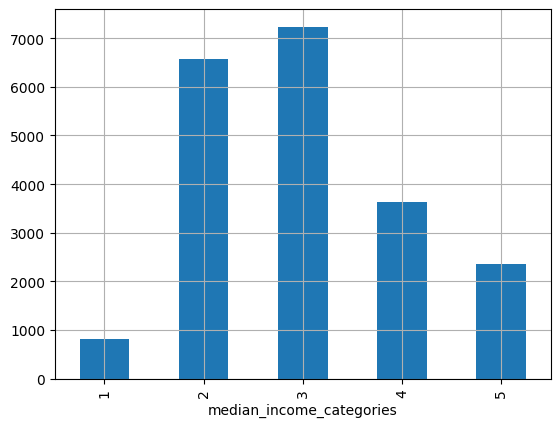

In [16]:
# محاسبه و نمایش تعداد نمونه‌های هر دسته به صورت نمودار ستونی برای بررسی توزیع
df["median_income_categories"].value_counts().sort_index().plot.bar(grid=True)

In [17]:
# وارد کردن StratifiedShuffleSplit برای تقسیم داده‌ها به صورت لایه‌بندی شده (stratified)
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
# تقسیم داده‌ها به train و test با حفظ نسبت طبقات درآمدی (stratified sampling)
str_train_set , str_test_set=train_test_split(df,test_size=0.2,stratify=df["median_income_categories"],random_state=40)

In [19]:
# حذف ستون 'median_income_categories' چون فقط برای دسته‌بندی اولیه استفاده شده و نیازی به آن در مدل نیست
str_train_set=str_train_set.drop("median_income_categories",axis=1)
str_test_set=str_test_set.drop("median_income_categories",axis=1)

In [20]:
train=str_train_set

#train=train.drop("ocean_proximity",axis=1)

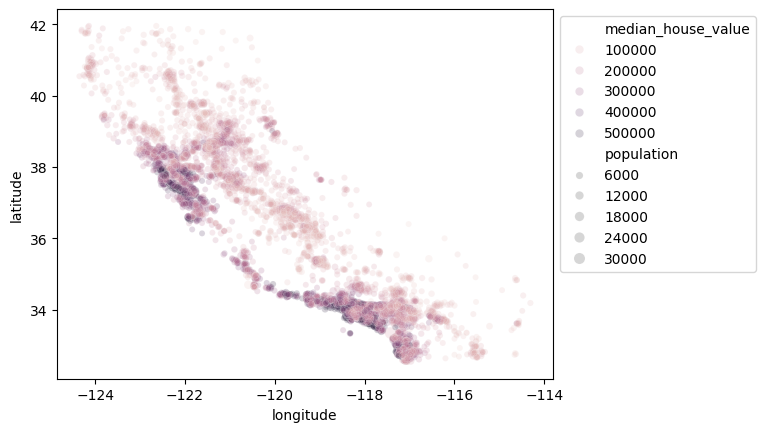

In [21]:
# رسم نمودار پراکندگی (Scatter Plot) برای داده‌های آموزش
# محور x: طول جغرافیایی (longitude)
# محور y: عرض جغرافیایی (latitude)
# اندازه نقاط با توجه به جمعیت (population) تنظیم شده است (نمایش اندازه جمعیت)
# alpha=0.2 برای ایجاد شفافیت نقاط (نمایش بهتر نقاط همپوشان)
# رنگ نقاط بر اساس مقدار median_house_value (میانگین قیمت خانه) تعیین می‌شود
ax=sns.scatterplot(data=train,x="longitude",y="latitude",size="population",alpha=0.2,hue="median_house_value")

# جابجایی جایگاه راهنمای رنگ (legend) به بالای چپ نمودار بیرون از قاب اصلی
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))

In [22]:
train=train.select_dtypes(include=[np.number]) # انتخاب فقط ستون های عددی از دیتافریم (برای عملیات های آماری یا مدلسازی)

# محاسبه ضریب همبستگی بین ستون‌های مختلف دیتافریم train و ستون هدف 'median_house_value'
# نتیجه یک سری (Series) است که نشان می‌دهد هر ویژگی چقدر با قیمت میانه خانه همبسته است
train.corr()["median_house_value"]

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [23]:
# ایجاد ستون جدید 'rooms_per_house' که نسبت تعداد کل اتاق‌ها به تعداد خانوارها را نشان می‌دهد
# این ویژگی بیانگر متوسط تعداد اتاق‌ها در هر خانه است و می‌تواند به مدل کمک کند
#ویژگی‌های ترکیبی مثل این معمولاً در مدل‌های یادگیری ماشین کمک می‌کنند تا بهتر رابطه‌ها را درک کنند.
train["rooms_per_house"]=train["total_rooms"]/train["households"]

# prepare data

In [24]:
# حذف ستون هدف 'median_house_value' از دیتافریم train و ذخیره بقیه ستون‌ها در متغیر train_features
train_features=train.drop("median_house_value",axis=1)

# ذخیره ستون هدف (قیمت میانه خانه) در متغیر جداگانه train_target برای آموزش مدل
train_target=train["median_house_value"]


##Data cleaning

In [25]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


# remove rows with NA values

In [26]:

# حذف ردیف‌هایی که در ستون 'total_bedrooms' مقدار گمشده (NaN) دارند
# و نمایش اطلاعات کلی (مثل تعداد ردیف و ستون، نوع داده‌ها) از دیتافریم پس از حذف این ردیف‌ها
train_features.dropna(subset=["total_bedrooms"]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 16344 entries, 16415 to 8967
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16344 non-null  float64
 1   latitude            16344 non-null  float64
 2   housing_median_age  16344 non-null  float64
 3   total_rooms         16344 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16344 non-null  float64
 6   households          16344 non-null  float64
 7   median_income       16344 non-null  float64
 8   rooms_per_house     16344 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


#train_features_with_imputed_na_values

In [27]:
# محاسبه میانه ستون 'total_bedrooms' برای استفاده در جایگزینی مقادیر گمشده
total_bedrooms_median=train_features["total_bedrooms"].median()

# جایگزینی مقادیر NaN در ستون 'total_bedrooms' با مقدار میانه محاسبه شده
train_features["total_bedrooms"]=train_features["total_bedrooms"].fillna(total_bedrooms_median)
train_features.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [28]:
# وارد کردن کلاس SimpleImputer از کتابخانه sklearn برای پر کردن مقادیر گمشده در داده‌ها
from sklearn.impute import SimpleImputer


In [29]:
train_features=train.drop("median_house_value",axis=1)
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [30]:
# ساخت یک شیء SimpleImputer با استراتژی جایگزینی مقدار گمشده بر اساس میانه ستون‌ها
simpel_impute=SimpleImputer(strategy="median")
#strategy="median" مشخص می‌کند که برای هر ستون عددی، مقادیر گمشده با میانه آن ستون پر شوند.


In [31]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [32]:
# انتخاب فقط ستون های عددی از دیتافریم (برای عملیات های آماری یا مدلسازی)
train_features_numberic=train_features.select_dtypes(include=[np.number])
train_features_numberic.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [33]:
# آموزش (fit) ایمپیوتر با استراتژی 'median' روی داده‌های عددی دیتافریم train_features_numeric
simpel_impute.fit(train_features_numberic)

# نمایش مقادیر میانه هر ستون که برای جایگزینی مقادیر NaN یاد گرفته شده است
print(simpel_impute.statistics_)

# محاسبه و نمایش میانه هر ستون به صورت مستقیم با pandas برای مقایسه
print(train_features_numberic.median().values)

[-118.48         34.25         29.         2129.          436.
 1168.          411.            3.5341        5.22483203]
[-118.48         34.25         29.         2129.          436.
 1168.          411.            3.5341        5.22483203]


In [34]:
# اعمال تبدیل ایمپیوت کردن روی داده‌های عددی برای جایگزینی مقادیر NaN با میانه هر ستون
simpel_impute.transform(train_features_numberic)

array([[-121.26      ,   37.88      ,   42.        , ...,   93.        ,
           3.1719    ,    5.        ],
       [-121.64      ,   37.85      ,   22.        , ...,  320.        ,
           4.4583    ,    6.246875  ],
       [-118.15      ,   33.95      ,   35.        , ...,  614.        ,
           2.7875    ,    4.48371336],
       ...,
       [-118.27      ,   34.17      ,   48.        , ...,  269.        ,
           5.5118    ,    5.79925651],
       [-121.33      ,   37.98      ,   36.        , ...,  544.        ,
           3.4625    ,    5.72242647],
       [-118.4       ,   34.        ,   37.        , ...,  259.        ,
           5.444     ,    5.92277992]])

In [35]:
# تبدیل آرایه خروجی به DataFrame جدید با همان ستون‌ها و اندیس‌های اصلی برای سهولت کار با داده‌ها
df_Update=pd.DataFrame(simpel_impute.transform(train_features_numberic),columns=train_features_numberic.columns,index=train_features_numberic.index)
df_Update.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB
